In [18]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
import seaborn as sns

In [19]:
meta = pd.read_csv("archive/Meta.csv")
train_df = pd.read_csv("archive/Train.csv")
test_df = pd.read_csv("archive/Test.csv")


In [20]:
print("Meta shape:", meta.shape)
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Meta shape: (43, 5)
Train shape: (39209, 8)
Test shape: (12630, 8)


In [21]:
print(train_df.head())
print(meta.head())


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
          Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22


In [22]:
print(meta.columns)


Index(['Path', 'ClassId', 'ShapeId', 'ColorId', 'SignId'], dtype='object')


In [23]:

label_map = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}



In [24]:
img_size = 64
X = []
y = []


In [33]:
for i in range(5000):
    img_path = os.path.join("archive", train_df['Path'][i])
    img = cv2.imread(img_path)

    if img is None: 
        print(f"Warning: Could not read {img_path}, skipping.")
        continue

    img = cv2.resize(img, (img_size, img_size))
    X.append(img)
    y.append(train_df['ClassId'][i])

X = np.array(X, dtype="float32") / 255.0
y = to_categorical(y, num_classes=len(meta))



In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(meta), activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-20 10:36:23.407764: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-08-20 10:36:23.408105: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-20 10:36:23.408125: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-20 10:36:23.408435: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-20 10:36:23.408478: I tensorflow/core/common_runtime/pluggable_device/plu

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10


2025-08-20 10:36:26.499448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.4965 - loss: 1.1958 - val_accuracy: 0.7226 - val_loss: 0.6903
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.8483 - loss: 0.3785 - val_accuracy: 0.9774 - val_loss: 0.0712
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.9764 - loss: 0.0790 - val_accuracy: 0.9831 - val_loss: 0.0452
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.9822 - loss: 0.0514 - val_accuracy: 0.9960 - val_loss: 0.0147
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9891 - loss: 0.0325 - val_accuracy: 0.9903 - val_loss: 0.0218
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9935 - loss: 0.0198 - val_accuracy: 0.9960 - val_loss: 0.0137
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9964 - loss: 0.0141 - val_accuracy: 0.9984 - val_loss: 0.0057
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9964 - loss: 0.0160 - val_accuracy: 0.99

In [37]:
X_test = []
for i in range(5000):
    img_path = os.path.join("archive", test_df['Path'][i])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    X_test.append(img)

X_test = np.array(X_test) / 255.0


In [38]:
img = cv2.imread("archive/Test/00005.png")  
img = cv2.resize(img, (img_size, img_size))
img = np.expand_dims(img, axis=0) / 255.0

prediction = model.predict(img)
pred_class = np.argmax(prediction)
pred_label = label_map[pred_class]

print(f"Predicted class ID: {pred_class}")
print(f"Predicted Traffic Sign: {pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted class ID: 2
Predicted Traffic Sign: Speed limit (50km/h)


In [39]:
model.save("traffic_sign_model.h5")
print("Model saved as traffic_sign_model.h5")


Model saved as traffic_sign_model.h5


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


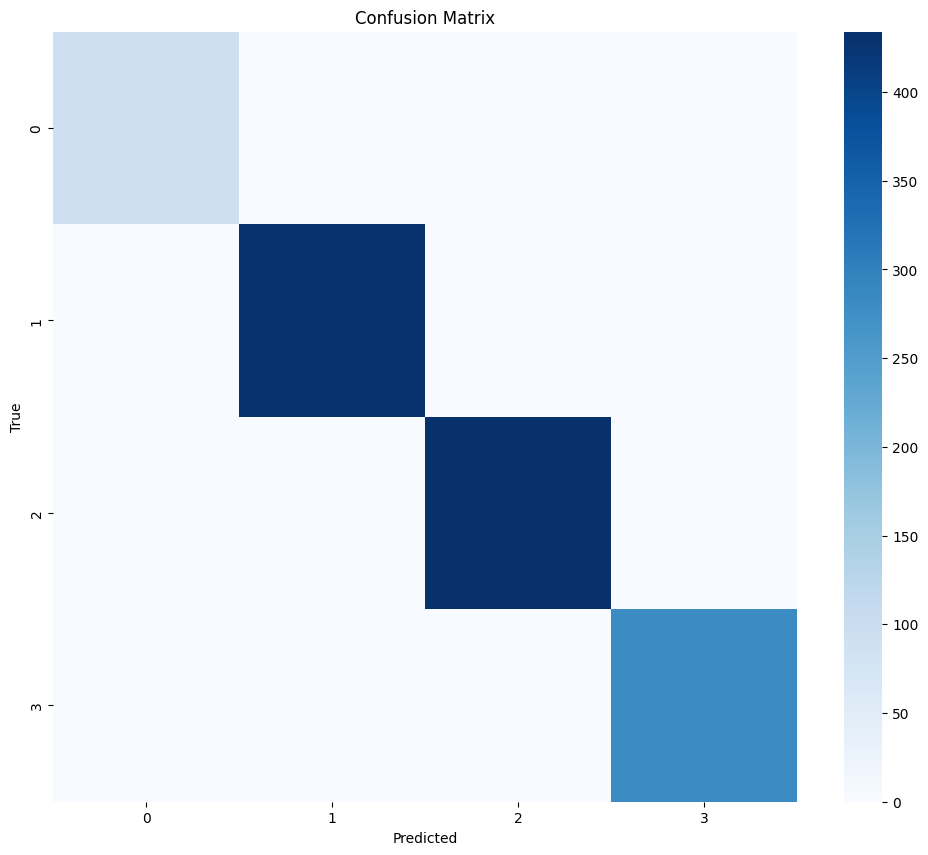

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       1.00      1.00      1.00       430
           2       1.00      1.00      1.00       435
          20       1.00      1.00      1.00       280

    accuracy                           1.00      1240
   macro avg       1.00      1.00      1.00      1240
weighted avg       1.00      1.00      1.00      1240



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_val_true, y_val_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_val_true, y_val_pred))


/var/folders/tz/vs99751553df2kc9_q7_jhk80000gn/T/ipykernel_1127/3906472020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ClassId", data=train_df, palette="Set2")


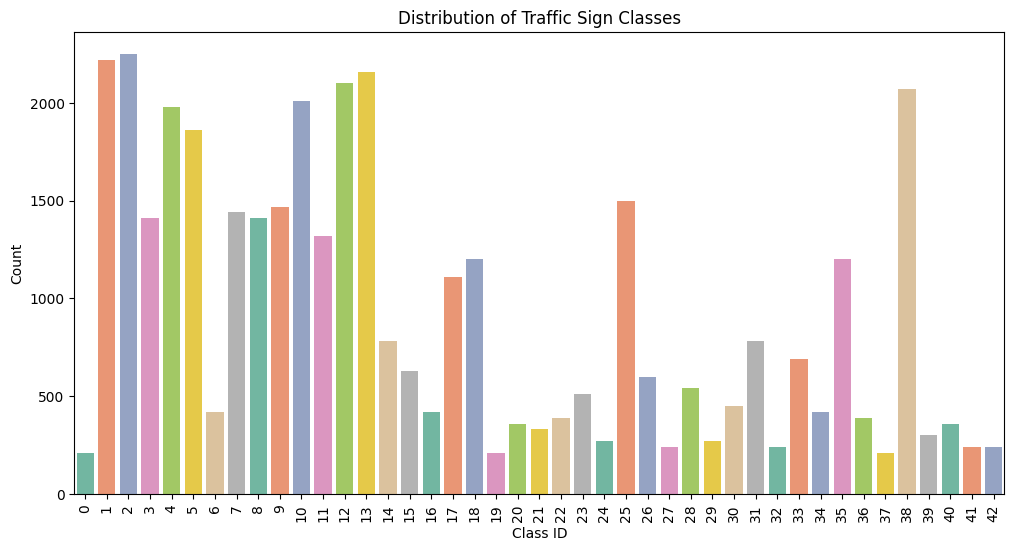

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x="ClassId", data=train_df, palette="Set2")
plt.title("Distribution of Traffic Sign Classes")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [42]:
avg_brightness = []
avg_r = []
avg_g = []
avg_b = []

for i in range(10): 
    img_path = os.path.join("archive", train_df['Path'][i])
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"⚠️ Could not read image: {img_path}")
        continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    avg_brightness.append(np.mean(gray))
    avg_r.append(np.mean(img[:,:,2]))
    avg_g.append(np.mean(img[:,:,1]))
    avg_b.append(np.mean(img[:,:,0]))

